In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [59]:
full_data = pd.read_csv('data/improved_players_full.csv')
fill_value = {'pace':0,'shooting':0,'passing':0,'dribbling':0,'defending':0,'physic':0,
              'player_tags':'','player_traits':'','club_position':'','player_positions':''}
full_data.fillna(value=fill_value, inplace=True)

# 重建json文件

In [60]:
full_data

,player_id,player_url,fifa_version,fifa_update,fifa_update_date,short_name,long_name,player_positions,overall,potential,...,rdm,rwb,lb,lcb,cb,rcb,rb,gk,player_face_url,player_class
0,231747,/player/231747/kylian-mbappe/230009,23,9,2023-01-13,K. Mbappé,Kylian Mbappé Lottin,"ST, LW",91,95,...,63+3,67+3,63+3,54+3,54+3,54+3,63+3,18+3,https://cdn.sofifa.net/players/231/747/23_120.png,world-top player
1,212622,/player/212622/joshua-kimmich/230009,23,9,2023-01-13,J. Kimmich,Joshua Walter Kimmich,"CDM, RB, CM",89,90,...,86+3,84+3,83+3,81+3,81+3,81+3,83+3,21+3,https://cdn.sofifa.net/players/212/622/23_120.png,world-top player
2,239085,/player/239085/erling-haaland/230009,23,9,2023-01-13,E. Haaland,Erling Braut Haaland,ST,89,94,...,64+3,63+3,61+3,62+3,62+3,62+3,61+3,19+3,https://cdn.sofifa.net/players/239/085/23_120.png,world-top player
3,215698,/player/215698/mike-maignan/230009,23,9,2023-01-13,M. Maignan,Mike Maignan,GK,87,90,...,41+2,36+2,34+2,35+2,35+2,35+2,34+2,85+2,https://cdn.sofifa.net/players/215/698/23_120.png,world-top player
4,228702,/player/228702/frenkie-de-jong/230009,23,9,2023-01-13,F. de Jong,Frenkie de Jong,CM,87,92,...,84+3,83+3,82+3,78+3,78+3,78+3,82+3,18+3,https://cdn.sofifa.net/players/228/702/23_120.png,world-top player
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241,228702,/player/228702/frenkie-de-jong/150059,15,59,2015-09-10,F. de Jong,Frenkie de Jong,CM,59,76,...,55,55,51,49,49,49,51,12,https://cdn.sofifa.net/players/228/702/15_120.png,below-average player
242,226754,/player/226754/ismael-bennacer/150059,15,59,2015-09-10,I. Bennacer,Ismaël Bennacer,CAM,54,74,...,44,45,41,38,38,38,41,14,https://cdn.sofifa.net/players/226/754/15_120.png,bad player
243,226226,/player/226226/giovani-lo-celso/150059,15,59,2015-09-10,G. Lo Celso,Giovani Lo Celso,LM,53,70,...,40,41,36,31,31,31,36,12,https://cdn.sofifa.net/players/226/226/15_120.png,bad player
244,228618,/player/228618/ferland-mendy/150059,15,59,2015-09-10,F. Mendy,Ferland Mendy,LB,51,62,...,46,50,51,54,54,54,51,12,https://cdn.sofifa.net/players/228/618/15_120.png,bad player


In [61]:
id_list = full_data['player_id'].unique().tolist()

In [62]:
player_lt = []
def player_data(id):
    player = {}
    player['player_id'] = id_list[0]
    player['long_name'] = full_data[full_data['player_id'] == id]['long_name'].iloc[0]
    player['player_positions'] = full_data[full_data['player_id'] == id]['player_positions'].iloc[0]
    player['overall'] = full_data[full_data['player_id'] == id]['overall'].to_list()[::-1]
    player['potential'] = full_data[full_data['player_id'] == id]['potential'].to_list()[::-1]
    player['age'] = full_data[full_data['player_id'] == id]['age'].iloc[0]
    player['player_tags'] = full_data[full_data['player_id'] == id]['player_tags'].iloc[0]
    player['player_traits'] = full_data[full_data['player_id'] == id]['player_traits'].iloc[0]
    player['value_eur'] = full_data[full_data['player_id'] == id]['value_eur'].to_list()[::-1]
    player['wage_eur'] = full_data[full_data['player_id'] == id]['wage_eur'].to_list()[::-1]
    player['player_face_url'] = full_data[full_data['player_id'] == id]['player_face_url'].iloc[0]
    player['evolutionImageURL'] = 'evolution.png'
    for index,row in full_data[full_data['player_id'] == id].iterrows():
    #print(row)
        level = f'skill_20{row.fifa_version}'
        player[level] = [row.shooting, row.passing, row.dribbling, row.defending, row.physic, row.pace]
    timeline = {}
    for index,row in full_data[full_data['player_id'] == id].iterrows():
        if row.club_name not in timeline.keys():
            start_date = f'20{row.fifa_version}-01-01'
            end_date = f'20{row.fifa_version+1}-01-01'
            timeline[row.club_name] = [start_date, end_date]
        else:
            timeline[row.club_name][0] = f'20{row.fifa_version}-01-01'
    player['timeline'] = timeline
    return player
for id in id_list:
    player_lt.append(player_data(id))

In [63]:
json_df = pd.DataFrame(player_lt)
json_df.fillna(value=0, inplace=True)
json_df = json_df.applymap(lambda x: [0,0,0,0,0] if x == 0 else x)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_22956\2091588952.py:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  json_df = json_df.applymap(lambda x: [0,0,0,0,0] if x == 0 else x)


In [64]:
json_df.columns

Index(['player_id', 'long_name', 'player_positions', 'overall', 'potential',
       'age', 'player_tags', 'player_traits', 'value_eur', 'wage_eur',
       'player_face_url', 'evolutionImageURL', 'skill_2023', 'skill_2022',
       'skill_2021', 'skill_2020', 'skill_2019', 'skill_2018', 'skill_2017',
       'skill_2016', 'timeline', 'skill_2015'],
      dtype='object')

# 进行可视化

In [65]:
full_data

,player_id,player_url,fifa_version,fifa_update,fifa_update_date,short_name,long_name,player_positions,overall,potential,...,rdm,rwb,lb,lcb,cb,rcb,rb,gk,player_face_url,player_class
0,231747,/player/231747/kylian-mbappe/230009,23,9,2023-01-13,K. Mbappé,Kylian Mbappé Lottin,"ST, LW",91,95,...,63+3,67+3,63+3,54+3,54+3,54+3,63+3,18+3,https://cdn.sofifa.net/players/231/747/23_120.png,world-top player
1,212622,/player/212622/joshua-kimmich/230009,23,9,2023-01-13,J. Kimmich,Joshua Walter Kimmich,"CDM, RB, CM",89,90,...,86+3,84+3,83+3,81+3,81+3,81+3,83+3,21+3,https://cdn.sofifa.net/players/212/622/23_120.png,world-top player
2,239085,/player/239085/erling-haaland/230009,23,9,2023-01-13,E. Haaland,Erling Braut Haaland,ST,89,94,...,64+3,63+3,61+3,62+3,62+3,62+3,61+3,19+3,https://cdn.sofifa.net/players/239/085/23_120.png,world-top player
3,215698,/player/215698/mike-maignan/230009,23,9,2023-01-13,M. Maignan,Mike Maignan,GK,87,90,...,41+2,36+2,34+2,35+2,35+2,35+2,34+2,85+2,https://cdn.sofifa.net/players/215/698/23_120.png,world-top player
4,228702,/player/228702/frenkie-de-jong/230009,23,9,2023-01-13,F. de Jong,Frenkie de Jong,CM,87,92,...,84+3,83+3,82+3,78+3,78+3,78+3,82+3,18+3,https://cdn.sofifa.net/players/228/702/23_120.png,world-top player
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241,228702,/player/228702/frenkie-de-jong/150059,15,59,2015-09-10,F. de Jong,Frenkie de Jong,CM,59,76,...,55,55,51,49,49,49,51,12,https://cdn.sofifa.net/players/228/702/15_120.png,below-average player
242,226754,/player/226754/ismael-bennacer/150059,15,59,2015-09-10,I. Bennacer,Ismaël Bennacer,CAM,54,74,...,44,45,41,38,38,38,41,14,https://cdn.sofifa.net/players/226/754/15_120.png,bad player
243,226226,/player/226226/giovani-lo-celso/150059,15,59,2015-09-10,G. Lo Celso,Giovani Lo Celso,LM,53,70,...,40,41,36,31,31,31,36,12,https://cdn.sofifa.net/players/226/226/15_120.png,bad player
244,228618,/player/228618/ferland-mendy/150059,15,59,2015-09-10,F. Mendy,Ferland Mendy,LB,51,62,...,46,50,51,54,54,54,51,12,https://cdn.sofifa.net/players/228/618/15_120.png,bad player


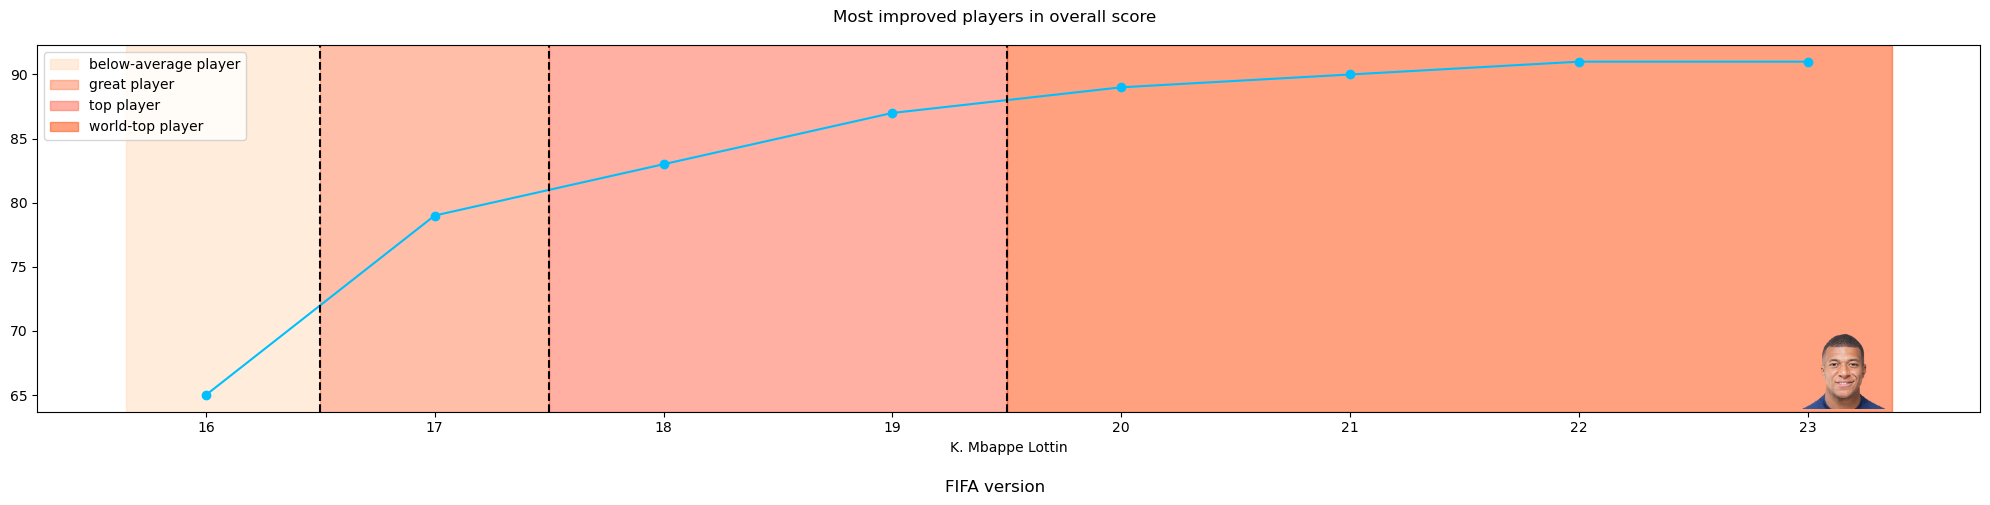

In [66]:
import urllib
from PIL import Image
import matplotlib
fig2, ax = plt.subplots()
fig2.set_figheight(5)
fig2.set_figwidth(20)
axvspan_color = {"world-top player":'orangered', "top player":'tomato', "great player":'coral', 
                      "above-average player":'lightsalmon', "below-average player":'peachpuff',"bad player":'linen'}
    # plot the overall score
id = id_list[0]
sub_df = full_data[full_data['player_id']==id]
ax.plot(sub_df['fifa_version'],sub_df['overall'],'o-',color = 'deepskyblue')
ax.set_xlabel(np.unique(sub_df['short_name'])[0])

# plot the change of the players' class 
player_class = None
xleft, xright = None,None

for row in sub_df.sort_values(by=['fifa_version']).iterrows():
    next_player_class = row[1]['player_class']
    if (player_class == next_player_class)|(player_class == None):
        pass
    else:
        xleft = xright if xright!=None else ax.get_xlim()[0]
        xright = row[1]['fifa_version'] - 0.5
        ax.axvspan(xleft, xright, alpha = 0.5, color = axvspan_color[player_class], label = player_class)
        ax.axvline(row[1]['fifa_version'] - 0.5,color='black',linestyle = '--')
    player_class = next_player_class
ax.axvspan(xright, ax.get_xlim()[-1], alpha = 0.5, color = axvspan_color[player_class], label = player_class)

# Add the players' face in the right bottom corner
face_image = np.unique(sub_df['player_face_url'])[-1]
req = urllib.request.Request(face_image, headers={'User-Agent': 'Mozilla/5.0'})
image = Image.open(urllib.request.urlopen(req))
img_np = np.array(image)
# Adding the image in the right bottom corner
imagebox = matplotlib.offsetbox.OffsetImage(img_np, zoom=0.5)
ab = matplotlib.offsetbox.AnnotationBbox(imagebox, (0.93, 0.12), frameon=False, xycoords='axes fraction')
ax.add_artist(ab)

ax.legend(loc='upper left')
ax.set_xticks(np.arange(min(sub_df['fifa_version']), max(sub_df['fifa_version']) + 1,1))

fig2.supxlabel('FIFA version')
fig2.suptitle("Most improved players in overall score")
fig2.tight_layout()

In [67]:
import plotly.graph_objects as go
import pandas as pd
import numpy as np
import urllib.request
from PIL import Image
from plotly.subplots import make_subplots
import os
os.makedirs('FootViz/public/playerface', exist_ok=True)

# Color mapping for player classes
axvspan_color = {"world-top player":'red', "top player":'orange', "great player":'coral', 
                      "above-average player":'lightsalmon', "below-average player":'peachpuff',"bad player":'linen'}
axvspan_color = {"world-top player":'orangered', "top player":'tomato', "great player":'coral', 
                      "above-average player":'lightsalmon', "below-average player":'peachpuff',"bad player":'linen'}

sub_df = full_data[full_data['player_id'] == id].iloc[::-1]

# Create a figure with Plotly
fig = go.Figure()
discount =3_500_000
# Add line plot for overall score
fig.add_trace(
    go.Scatter(
        x=[sub_df['fifa_version'].iloc[0]],
        y=[sub_df['overall'].iloc[0]],
        marker=dict(
        size=[sub_df['value_eur'].iloc[0] / discount],
        opacity=0.3  
    ),
        mode='lines+markers',
        name=f"Overall",
        line=dict(color='deepskyblue'),
        customdata=[sub_df['club_name'].iloc[0],sub_df['value_eur'].iloc[0]],
        hovertemplate=(
            "<b>Club name:</b> %{customdata[0]}<br>"
            "<b>Overall:</b> %{y}<br>"
            "<b>Value in EUR</b>: %{customdata[1]:,}<br>"
            "<extra></extra>"  # This removes the trace name from the hover label
        )
    )
)
fig.add_trace(
    go.Scatter(
        x=[sub_df['fifa_version'].iloc[0]],
        y=[sub_df['potential'].iloc[0]],
        mode='lines+markers',
        name=f"Potential",
        line=dict(color='deepskyblue'),
        hovertemplate=(
            "<b>Potential:</b> %{y}<br>"
        )
    )
)
for player_class, color in axvspan_color.items():
    fig.add_trace(
        go.Scatter(
            x=[None], y=[None],
            mode='markers',
            marker=dict(size=10, color=color),
            legendgroup=player_class,
            showlegend=True,
            name=player_class,
            visible='legendonly'
        )
    )

frames = []
for i in range(1, len(sub_df) + 2):
    # Subset data for the current frame
    current_df = sub_df.iloc[:i]
    
    # Add the current frame data
    frame_data = [go.Scatter(
        x=current_df['fifa_version'],
        y=current_df['overall'],
        marker=dict(
            size=current_df['value_eur'] / discount,
            opacity=0.3 ,
        ),
        mode='lines+markers',
        line=dict(color='deepskyblue'),
        customdata=current_df[['club_name','value_eur']],
    )]
    frame_data.append(go.Scatter(
        x=current_df['fifa_version'],
        y=current_df['potential'],
        mode='lines+markers',
        line=dict(color='green')
    ))
    
    # Add colored spans for player classes up to the current frame
    annotations = []
    shapes = []
    #player_class = None
    #xleft = current_df['fifa_version'].min() - 0.5
    
    for j, row in current_df.iterrows():
        """
        next_player_class = row['player_class']
        #print(player_class)
        if (player_class is None):
            player_class = next_player_class
            continue
        elif (player_class != next_player_class):
            xright = row['fifa_version'] + 0.5
        elif (j == len(current_df) - 1) &(i == len(sub_df) + 1):
            xright = row['fifa_version'] + 5
        else:
            xright = row['fifa_version'] + 0.5

    """ 
        player_class = row['player_class']
        xleft = row['fifa_version'] - 0.5
        xright = row['fifa_version'] + 0.5
        shapes.append(dict(
            type="rect",
            xref="x",
            yref="paper",
            x0=xleft,
            x1=xright,
            y0=0,
            y1=1,
            fillcolor=axvspan_color[player_class],
            layer="below",
            line_width=0,
        ))
        frame_data.append(go.Scatter(
            x=[xleft, xright],
            y=[0,100],  # Dummy y-values, we won't use them
            #fillcolor=axvspan_color[player_class],
            fillcolor='orange',
        ))
        annotations.append(dict(
            x=(xleft + xright) / 2,
            y=max(sub_df['overall']),
            text=player_class,
            showarrow=False,
            yshift=10
        ))
        #xleft = xright
        #player_class = next_player_class
    
    frames.append(go.Frame(
        data=frame_data,
        layout=go.Layout( shapes=shapes)
    ))

fig.frames = frames

# Add player's face image as an annotation
face_image = np.unique(sub_df['player_face_url'])[-1]
req = urllib.request.Request(face_image, headers={'User-Agent': 'Mozilla/5.0'})
image = Image.open(urllib.request.urlopen(req))
path = f'FootViz/public/playerface/{np.unique(sub_df["long_name"])[0]}.png'
image.save(path)
image_url = face_image  # Using the URL directly for Plotly annotation
#print(image_url)

fig.add_layout_image(
    dict(
        source=path,
        xref="paper", yref="paper",
        x=0.9, y=0.1,
        sizex=0.15, sizey=0.15,
        xanchor="center", yanchor="middle"
    )
)

# Update layout for animation
fig.update_layout(
    height=600,
    width=1200,
    showlegend=True,
    title_text=f"{np.unique(sub_df['long_name'])[0]}",
    title_x = 0.5,
    title_y = 0.9,
    xaxis=dict(
        showgrid=False  
    ),
    yaxis=dict(
        showgrid=False  
    ),
    updatemenus=[dict(
        type="buttons",
        showactive=False,
        buttons=[dict(label="Play",
                          method="animate",
                          args=[None, dict(frame=dict(duration=500, redraw=True), fromcurrent=True, mode='immediate')]),
                    ]
    )]
)

fig.update_xaxes(title_text="FIFA version")

# Show plot
fig.show()

fig.write_html(f"FootViz/public/plots/{np.unique(sub_df['long_name'])[0]}.html")

In [68]:
def get_vis(id):
    sub_df = full_data[full_data['player_id'] == id].iloc[::-1]

    # Create a figure with Plotly
    fig = go.Figure()
    discount =3_500_000
    # Add line plot for overall score
    fig.add_trace(
        go.Scatter(
            x=[sub_df['fifa_version'].iloc[0]],
            y=[sub_df['overall'].iloc[0]],
            marker=dict(
            size=[sub_df['value_eur'].iloc[0] / discount],
            opacity=0.3  
        ),
            mode='lines+markers',
            name=f"Overall",
            line=dict(color='deepskyblue'),
            customdata=[sub_df['club_name'].iloc[0],sub_df['value_eur'].iloc[0], sub_df['league_name'].iloc[0]],
            hovertemplate=(
                "<b>Club name:</b> %{customdata[0]}<br>"
                "<b>League name:</b> %{customdata[2]}<br>"
                "<b>Overall:</b> %{y}<br>"
                "<b>Value in EUR</b>: %{customdata[1]:,}<br>"
                "<extra></extra>"  # This removes the trace name from the hover label
            )
        )
    )
    fig.add_trace(
        go.Scatter(
            x=[sub_df['fifa_version'].iloc[0]],
            y=[sub_df['potential'].iloc[0]],
            mode='lines+markers',
            name=f"Potential",
            line=dict(color='deepskyblue'),
            hovertemplate=(
                "<b>Potential:</b> %{y}<br>"
            )
        )
    )
    for player_class, color in axvspan_color.items():
        fig.add_trace(
            go.Scatter(
                x=[None], y=[None],
                mode='markers',
                marker=dict(size=10, color=color),
                legendgroup=player_class,
                showlegend=True,
                name=player_class,
                visible='legendonly'
            )
        )

    frames = []
    for i in range(1, len(sub_df) + 2):
        # Subset data for the current frame
        current_df = sub_df.iloc[:i]
        
        # Add the current frame data
        frame_data = [go.Scatter(
            x=current_df['fifa_version'],
            y=current_df['overall'],
            marker=dict(
                size=current_df['value_eur'] / discount,
                opacity=0.3 ,
            ),
            mode='lines+markers',
            line=dict(color='deepskyblue'),
            customdata=current_df[['club_name','value_eur','league_name']],
        )]
        frame_data.append(go.Scatter(
            x=current_df['fifa_version'],
            y=current_df['potential'],
            mode='lines+markers',
            line=dict(color='green')
        ))
        
        # Add colored spans for player classes up to the current frame
        annotations = []
        shapes = []
        #player_class = None
        #xleft = current_df['fifa_version'].min() - 0.5
        
        for j, row in current_df.iterrows():
            """
            next_player_class = row['player_class']
            #print(player_class)
            if (player_class is None):
                player_class = next_player_class
                continue
            elif (player_class != next_player_class):
                xright = row['fifa_version'] - 0.5
            elif (j == len(current_df) - 1) &(i == len(sub_df) + 1):
                xright = row['fifa_version'] + 5
            else:
                xright = row['fifa_version'] + 0.5
            """
            player_class = row['player_class']
            xleft = row['fifa_version'] - 0.5
            xright = row['fifa_version'] + 0.5
            shapes.append(dict(
                type="rect",
                xref="x",
                yref="paper",
                x0=xleft,
                x1=xright,
                y0=0,
                y1=1,
                fillcolor=axvspan_color[player_class],
                layer="below",
                line_width=0,
            ))
            frame_data.append(go.Scatter(
                x=[xleft, xright],
                y=[0,0],  # Dummy y-values, we won't use them
                #fillcolor=axvspan_color[player_class],
                fillcolor='orange',
            ))
            annotations.append(dict(
                x=(xleft + xright) / 2,
                y=max(sub_df['overall']),
                text=player_class,
                showarrow=False,
                yshift=10
            ))
            #xleft = xright
            #player_class = next_player_class
        
        frames.append(go.Frame(
            data=frame_data,
            layout=go.Layout( shapes=shapes)
        ))

    fig.frames = frames

    # Add player's face image as an annotation
    face_image = np.unique(sub_df['player_face_url'])[-1]
    req = urllib.request.Request(face_image, headers={'User-Agent': 'Mozilla/5.0'})
    image = Image.open(urllib.request.urlopen(req))
    path = f'FootViz/public/playerface/{np.unique(sub_df["long_name"])[0]}.png'
    image.save(path)
    image_url = face_image  # Using the URL directly for Plotly annotation
    #print(image_url)

    fig.add_layout_image(
        dict(
            source=path,
            xref="paper", yref="paper",
            x=0.9, y=0.1,
            sizex=0.15, sizey=0.15,
            xanchor="center", yanchor="middle"
        )
    )

    # Update layout for animation
    fig.update_layout(
        height=600,
        width=800,
        showlegend=True,
        title_text=f"{np.unique(sub_df['long_name'])[0]}",
        title_x = 0.5,
        title_y = 0.9,
        xaxis=dict(
            showgrid=False  
        ),
        yaxis=dict(
            showgrid=False  
        ),
        updatemenus=[dict(
            type="buttons",
            showactive=False,
            buttons=[dict(label="Play",
                            method="animate",
                            args=[None, dict(frame=dict(duration=500, redraw=True), fromcurrent=True, mode='immediate')]),
                        ]
        )]
    )

    fig.update_xaxes(title_text="FIFA version")

    # Show plot
    #fig.show()

    fig.write_html(f"FootViz/public/plots/{np.unique(sub_df['long_name'])[0]}.html")

In [69]:
from tqdm import tqdm
for id in tqdm(id_list):
    get_vis(id)

  0%|          | 0/31 [00:00<?, ?it/s]

100%|██████████| 31/31 [00:14<00:00,  2.16it/s]


# 保存json

In [53]:
json_df.columns

Index(['player_id', 'long_name', 'player_positions', 'overall', 'potential',
       'age', 'player_tags', 'player_traits', 'value_eur', 'wage_eur',
       'player_face_url', 'evolutionImageURL', 'skill_2023', 'skill_2022',
       'skill_2021', 'skill_2020', 'skill_2019', 'skill_2018', 'skill_2017',
       'skill_2016', 'timeline', 'skill_2015'],
      dtype='object')

In [54]:
json_df['evolutionImageURL'] = json_df['long_name'].apply(lambda x: f'plots/{x}.html')

In [55]:
for index,row in json_df.iterrows():
    new_timeline = []
    old_timeline = row['timeline']
    for club in row['timeline'].keys():
        one_team =  {}
        one_team['club_name'] = club
        one_team['start_date'] = old_timeline[club][0]
        one_team['end_date'] = old_timeline[club][1]
        new_timeline.append(one_team)
    print(new_timeline)
    json_df.at[index,'timeline'] = new_timeline

[{'club_name': 'Paris Saint Germain', 'start_date': '2018-01-01', 'end_date': '2024-01-01'}, {'club_name': 'Monaco', 'start_date': '2016-01-01', 'end_date': '2018-01-01'}]
[{'club_name': 'FC Bayern München', 'start_date': '2016-01-01', 'end_date': '2024-01-01'}, {'club_name': 'RB Leipzig', 'start_date': '2015-01-01', 'end_date': '2016-01-01'}]
[{'club_name': 'Manchester City', 'start_date': '2023-01-01', 'end_date': '2024-01-01'}, {'club_name': 'Borussia Dortmund', 'start_date': '2021-01-01', 'end_date': '2023-01-01'}, {'club_name': 'Salzburg', 'start_date': '2020-01-01', 'end_date': '2021-01-01'}, {'club_name': 'Molde', 'start_date': '2017-01-01', 'end_date': '2020-01-01'}]
[{'club_name': 'Milan', 'start_date': '2022-01-01', 'end_date': '2024-01-01'}, {'club_name': 'Lille', 'start_date': '2016-01-01', 'end_date': '2022-01-01'}, {'club_name': 'Paris Saint-Germain', 'start_date': '2015-01-01', 'end_date': '2016-01-01'}]
[{'club_name': 'FC Barcelona', 'start_date': '2020-01-01', 'end_dat

In [56]:
json_df

,player_id,long_name,player_positions,overall,potential,age,player_tags,player_traits,value_eur,wage_eur,...,skill_2023,skill_2022,skill_2021,skill_2020,skill_2019,skill_2018,skill_2017,skill_2016,timeline,skill_2015
0,231747,Kylian Mbappé Lottin,"ST, LW","[65, 79, 83, 87, 89, 90, 91, 91]","[85, 92, 94, 95, 95, 95, 95, 95]",23,"#Speedster, #Dribbler, #Acrobat, #Clinical Fin...","Solid Player, Flair, Speed Dribbler (AI), Outs...","[1000000, 17000000, 41500000, 72000000, 935000...","[2000, 40000, 60000, 80000, 150000, 160000, 23...",...,"[89.0, 80.0, 92.0, 36.0, 76.0, 97.0]","[88.0, 80.0, 92.0, 36.0, 77.0, 97.0]","[86.0, 78.0, 91.0, 39.0, 76.0, 96.0]","[84.0, 78.0, 90.0, 39.0, 75.0, 96.0]","[81.0, 79.0, 89.0, 39.0, 72.0, 96.0]","[80.0, 74.0, 85.0, 47.0, 74.0, 90.0]","[75.0, 72.0, 82.0, 47.0, 72.0, 88.0]","[62.0, 56.0, 70.0, 30.0, 54.0, 81.0]","[{'club_name': 'Paris Saint Germain', 'start_d...","[0, 0, 0, 0, 0]"
1,231747,Joshua Walter Kimmich,"CDM, RB, CM","[64, 71, 80, 81, 85, 86, 88, 89, 89]","[78, 82, 87, 87, 88, 88, 90, 90, 90]",27,#Crosser,"Leadership, Long Passer (AI), Playmaker (AI)","[400000, 2800000, 20000000, 20500000, 40500000...","[4000, 25000, 80000, 80000, 90000, 125000, 145...",...,"[72.0, 87.0, 84.0, 83.0, 79.0, 68.0]","[73.0, 87.0, 84.0, 83.0, 79.0, 70.0]","[72.0, 86.0, 84.0, 81.0, 79.0, 71.0]","[69.0, 86.0, 84.0, 79.0, 78.0, 72.0]","[68.0, 83.0, 82.0, 77.0, 73.0, 73.0]","[67.0, 82.0, 80.0, 77.0, 73.0, 70.0]","[67.0, 80.0, 78.0, 76.0, 71.0, 70.0]","[52.0, 71.0, 73.0, 59.0, 63.0, 62.0]","[{'club_name': 'FC Bayern München', 'start_dat...","[51.0, 65.0, 69.0, 54.0, 63.0, 69.0]"
2,231747,Erling Braut Haaland,ST,"[58, 61, 68, 75, 84, 88, 89]","[78, 83, 85, 87, 92, 94, 94]",21,"#Aerial Threat, #Distance Shooter, #Strength, ...","Speed Dribbler (AI), Power Header","[250000, 550000, 1800000, 11000000, 92000000, ...","[1000, 1000, 2000, 15000, 56000, 110000, 230000]",...,"[91.0, 65.0, 80.0, 49.0, 88.0, 89.0]","[91.0, 65.0, 80.0, 45.0, 88.0, 89.0]","[87.0, 63.0, 76.0, 43.0, 85.0, 85.0]","[73.0, 57.0, 72.0, 36.0, 79.0, 86.0]","[64.0, 52.0, 66.0, 32.0, 78.0, 79.0]","[58.0, 47.0, 60.0, 21.0, 70.0, 70.0]","[57.0, 44.0, 58.0, 18.0, 63.0, 69.0]","[0, 0, 0, 0, 0]","[{'club_name': 'Manchester City', 'start_date'...","[0, 0, 0, 0, 0]"
3,231747,Mike Maignan,GK,"[56, 66, 67, 73, 75, 80, 82, 84, 87]","[74, 76, 77, 81, 83, 87, 86, 89, 90]",26,,"Leadership, GK Long Throw, Comes For Crosses","[60000, 775000, 1000000, 4400000, 7500000, 160...","[2000, 4000, 10000, 20000, 15000, 28000, 31000...",...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0]","[{'club_name': 'Milan', 'start_date': '2022-01...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0]"
4,231747,Frenkie de Jong,CM,"[59, 63, 70, 72, 78, 86, 85, 87, 87]","[76, 79, 80, 82, 86, 92, 90, 92, 92]",25,"#Dribbler, #Playmaker, #Acrobat, #Complete Mid...","Finesse Shot, Flair, Playmaker (AI), Outside F...","[100000, 650000, 1900000, 5000000, 15000000, 6...","[2000, 2000, 7000, 8000, 15000, 210000, 190000...",...,"[69.0, 86.0, 87.0, 77.0, 78.0, 82.0]","[69.0, 85.0, 88.0, 77.0, 78.0, 81.0]","[64.0, 84.0, 87.0, 76.0, 77.0, 80.0]","[64.0, 84.0, 87.0, 76.0, 77.0, 78.0]","[56.0, 79.0, 85.0, 66.0, 65.0, 73.0]","[51.0, 73.0, 79.0, 58.0, 60.0, 76.0]","[51.0, 70.0, 77.0, 58.0, 59.0, 69.0]","[51.0, 65.0, 65.0, 48.0, 52.0, 66.0]","[{'club_name': 'FC Barcelona', 'start_date': '...","[46.0, 62.0, 61.0, 46.0, 52.0, 65.0]"
5,231747,Rodrigo Hernández Cascante,CDM,"[67, 70, 72, 82, 85, 85, 86, 87]","[80, 80, 80, 87, 90, 88, 89, 89]",26,,"Solid Player, Long Shot Taker (AI)","[1100000, 1900000, 4500000, 29000000, 47000000...","[7000, 15000, 15000, 60000, 145000, 145000, 17...",...,"[72.0, 78.0, 79.0, 83.0, 84.0, 58.0]","[70.0, 77.0, 78.0, 82.0, 82.0, 61.0]","[68.0, 77.0, 77.0, 82.0, 79.0, 65.0]","[68.0, 77.0, 77.0,

In [57]:
import json
json_str = json_df.to_dict(orient='records')
with open('FootViz/public/improved_players.json', 'w') as file:
    json.dump(json_str, file)